In [1]:
import numpy as np; np.random.seed(10)
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
mean, cov = [4.92, 4.84, 4.65, 5.46, 4.72, 4.69, 4.69], [1.11, 1.19, 1.19, 1.26, 1.12, 1.10, 1.02]

data = [np.random.normal(mean[i], cov[i], size=1000) for i in range(len(mean))]
data_label = ['Baseline', 'OLS', 'SVM', 'CART', 'kNN', 'RF', 'AB.R2']

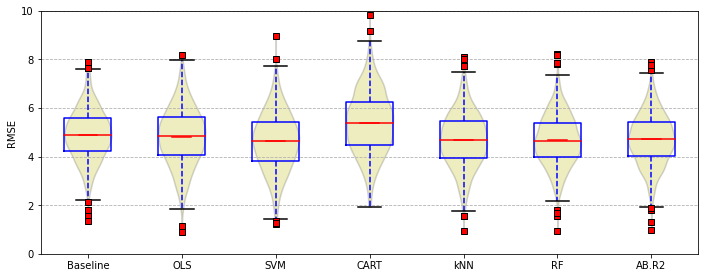

In [2]:
def violin_boxplot(data, data_label):
    plt.boxplot(data, showfliers=True, showmeans=False, meanline=False, boxprops={'color': 'blue', 'linewidth': 1.5},
                whiskerprops={'color': 'blue', 'linestyle': '--', 'linewidth': 1.5},capprops={'linewidth': 1.5},
                flierprops={'markerfacecolor': 'red', 'marker': 's'}, medianprops={'color': 'red', 'linewidth': 1.5},
                # meanprops={'color': 'green', 'linewidth': 1.5, 'linestyle': '--'}
                )
    violin_parts = plt.violinplot(data, showextrema=False)
    for pc in violin_parts['bodies']:
        pc.set_facecolor('#c9c62f')
        pc.set_edgecolor('#71716a')
        pc.set_linewidths(1.5)
    [plt.plot([n+0.9, n+1.1],[sum(data[n])/len(data[n]), sum(data[n])/len(data[n])], color='red', linewidth=1.5) for n in range(len(data))]
    plt.ylim(0, 10)
    plt.ylabel('RMSE')
    plt.xticks(range(1, len(data_label)+1), data_label)
    plt.grid(axis='y', linestyle='--')

violin_boxplot(data, data_label)
plt.gcf().set_size_inches(11.78,4.47)
plt.show()

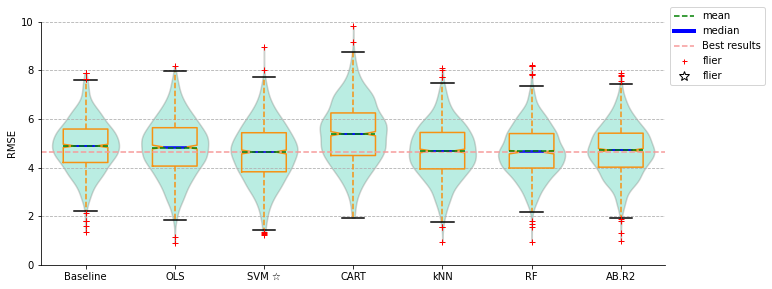

In [7]:
data_label = ['Baseline', 'OLS', 'SVM ☆', 'CART', 'kNN', 'RF', 'AB.R2']
def violin_boxplot(data, data_label):
    plt.boxplot(data, showfliers=True, showmeans=True, meanline=True, boxprops={'color': '#f69213', 'linewidth': 1.5},
                whiskerprops={'color': '#f69213', 'linestyle': '--', 'linewidth': 1.5},capprops={'linewidth': 1.5},
                flierprops={'markeredgecolor': 'red', 'marker': '+'}, medianprops={'color': 'blue', 'linewidth': 1.5},notch=True,
                meanprops={'color': 'green', 'linewidth': 1.5, 'linestyle': '--'}
                )
    violin_parts = plt.violinplot(data, showextrema=False, widths=0.75)
    for pc in violin_parts['bodies']:
        pc.set_facecolor('#1cc4a2')
        pc.set_edgecolor('#71716a')
        pc.set_linewidths(1.5)
    [plt.plot([n+0.9, n+1.1],[sum(data[n])/len(data[n]), sum(data[n])/len(data[n])], color='blue', linewidth=1.5) for n in range(len(data))]
    plt.ylim(0, 10)
    plt.ylabel('RMSE')
    plt.xticks(range(1, len(data_label)+1), data_label)
    plt.grid(axis='y', linestyle='--')
    legend_elements = [Line2D([0], [0], color='g', ls="--", label='mean'),
                       Line2D([0], [0], color='b', lw=4, label='median'),
                       Line2D([0], [0], color='#f79b9b', ls="--", label='Best results'),
                       Line2D([0], [0], marker='+', color='w', markeredgecolor='r', label='flier',
                              markerfacecolor='r', markersize=5),
                       Line2D([0], [0], marker='*', color='w', markeredgecolor='k', label='Best model',
                              markerfacecolor='w', markersize=10),
                      ]
    # plt.legend(handles=legend_elements, loc='NorthOutside')
    box = plt.gca().get_position()
    plt.gca().set_position([box.x0, box.y0, box.width*0.95, box.height])
    plt.gca().legend(handles=legend_elements,loc='center left', bbox_to_anchor=(1., 0.9))
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.axhline(y=4.65, ls="--", color="#f79b9b")
violin_boxplot(data, data_label)
plt.gcf().set_size_inches(11.78,4.47)
plt.show()